In [159]:
import snowflake.connector
import pandas as pd
# Establish connection
conn = snowflake.connector.connect(
             user='RAJIB5',
            password='Rajib@123',
            account='uw04501.central-india.azure',
            warehouse='COMPUTE_WH',
            database='ML_Data',
            schema='Public'

)



# Create a cursor
cursor = conn.cursor()

# Fetch data from the 'module' table
cursor.execute("SELECT * FROM module")
module_data = cursor.fetchall()
module_columns = [desc[0] for desc in cursor.description]

# Fetch data from the 'users' table
cursor.execute("SELECT * FROM users")
users_data = cursor.fetchall()
users_columns = [desc[0] for desc in cursor.description]

# Fetch data from the 'marks' table
cursor.execute("SELECT * FROM marks")
marks_data = cursor.fetchall()
marks_columns = [desc[0] for desc in cursor.description]

# Close cursor and connection
cursor.close()
conn.close()

# Convert fetched data to pandas DataFrames
module_df = pd.DataFrame(module_data, columns=module_columns)
users_df = pd.DataFrame(users_data, columns=users_columns)
marks_df = pd.DataFrame(marks_data, columns=marks_columns)

# Now you have your data in pandas DataFrames (module_df, users_df, marks_df)
# You can use these DataFrames for further data manipulation or analysis

# For example, you can print the first few rows of each DataFrame
print("Module Data:")
display(module_df.head())

print("\nUsers Data:")
display(users_df.head())

print("\nMarks Data:")
display(marks_df.head())

Module Data:


,_ID,MODULE_NAME,TRAINEE_COUNT,LEVEL,START_DATE,END_DATE,QUIZ_ID,TRAINER_ID
0,6617adb7e10537e70a816d52,ML Basics,65,Intermidiate,2022-07-22,2022-07-27,6610e2f9e10537e6f9e783b7,6617ad57e10537e7b003c811
1,6617adb7e10537e70a816d54,Data Engineering,38,Basic,2024-02-26,2024-03-01,6610e2f9e10537e71b41a7c8,6617ad57e10537e6c405f8fa
2,6617adb7e10537e70a816d56,ML Basics,23,Advance,2023-01-27,2023-02-05,6610e2f9e10537e841ea2b20,6617ad57e10537e8928bc049
3,6617adb7e10537e70a816d59,ML Basics,90,Intermidiate,2021-08-13,2021-08-19,6610e2f9e10537e8a3bceecb,6617ad57e10537e7b003c7fd
4,6617adb7e10537e70a816d5b,DevOps Operations,85,Intermidiate,2021-05-25,2021-06-01,6610e2f9e10537e7c28558f5,6617ad57e10537e6c405f90d



Users Data:


,_ID,NAME,EMAIL,PASSWORD,ROLE,CHECKRESET,MODULES
0,6617ad57e10537e70a816d33,Barnebas Malarkey,bmalarkey0@vimeo.com,lN2*#t(5,Employee,false,6617adb7e10537e85f4fe57c
1,6617ad57e10537e70a816d34,Lauralee Arkow,larkow1@google.nl,"nZ6'+J""g#lXGft&~",Employee,false,6617adb7e10537e70a816d54
2,6617ad57e10537e70a816d35,Benedikt Credland,bcredland2@vk.com,xV6$nL_*$R,Employee,true,6617adb8e10537e8a3bcf26c
3,6617ad57e10537e70a816d36,Brew Sharkey,bsharkey3@scribd.com,nY5%i'~8413S,Employee,false,6617adb7e10537e841ea2ead
4,6617ad57e10537e70a816d37,Kassia Ryton,kryton4@ucoz.com,iK4{`#3H93@PH,Employee,false,6617adb7e10537e6dda6cd0f



Marks Data:


,_ID,MODULEID,USERID,MARKS
0,6617ae34e10537e70a816d71,6617adb7e10537e7b003c82c,6617ad57e10537e7a3c973ae,14
1,6617ae35e10537e70a816d72,6617adb7e10537e7e7de07e9,6617ad57e10537e740772e09,56
2,6617ae35e10537e70a816d73,6617adb7e10537e8928bc058,6617ad57e10537e8c57ab4a6,80
3,6617ae35e10537e70a816d74,6617adb7e10537e7c521049e,6617ad57e10537e6c405f912,91
4,6617ae35e10537e70a816d75,6617adb7e10537e7e7de07e6,6617ad57e10537e7703662d4,100


In [160]:
pd.merge(marks_df, module_df, left_on='MODULEID', right_on='_ID', how='right')

,_ID_x,MODULEID,USERID,MARKS,_ID_y,MODULE_NAME,TRAINEE_COUNT,LEVEL,START_DATE,END_DATE,QUIZ_ID,TRAINER_ID
0,6617ae35e10537e7b003c844,6617adb7e10537e70a816d52,6617ad57e10537e8c57ab4ac,19,6617adb7e10537e70a816d52,ML Basics,65,Intermidiate,2022-07-22,2022-07-27,6610e2f9e10537e6f9e783b7,6617ad57e10537e7b003c811
1,6617ae35e10537e82b6ef875,6617adb7e10537e70a816d54,6617ad57e10537e740772df4,50,6617adb7e10537e70a816d54,Data Engineering,38,Basic,2024-02-26,2024-03-01,6610e2f9e10537e71b41a7c8,6617ad57e10537e6c405f8fa
2,6617ae35e10537e875099d18,6617adb7e10537e70a816d56,6617ad57e10537e6f9e7872a,7,6617adb7e10537e70a816d56,ML Basics,23,Advance,2023-01-27,2023-02-05,6610e2f9e10537e841ea2b20,6617ad57e10537e8928bc049
3,6617ae35e10537e6d7ef1337,6617adb7e10537e70a816d56,6617ad57e10537e6c405f90e,60,6617adb7e10537e70a816d56,ML Basics,23,Advance,2023-01-27,2023-02-05,6610e2f9e10537e841ea2b20,6617ad57e10537e8928bc049
4,6617ae35e10537e8a3bcf272,6617adb7e10537e70a816d59,6617ad57e10537e80985c4bf,75,6617adb7e10537e70a816d59,ML Basics,90,Intermidiate,2021-08-13,2021-08-19,6610e2f9e10537e8a3bceecb,6617ad57e10537e7b003c7fd
...,...,...,...,...,...,...,...,...,...,...,...,...
819,6617ae35e10537e875099d29,6617adb8e10537e8d6b75ff1,6617ad57e10537e6dda6ccda,34,6617adb8e10537e8d6b75ff1,Git & Version Control,93,Intermidiate,2023-08-24,2023-08-29,6610e2f9e10537e7916b9f18,6617ad57e10537e8a3bcf24c
820,6617ae35e10537e6d7ef131b,6617adb8e10537e8d6b75ff1,6617ad57e10537e80c7b874b,15,6617adb8e10537e8d6b75ff1,Git & Version Control,93,Intermidiate,2023-08-24,2023-08-29,6610e2f9e10537e7916b9f18,6617ad57e10537e8a3bcf24c
821,NaN,NaN,NaN,NaN,6617adb8e10537e8d6b75ff4,Data Engineering,46,Intermidiate,2022-08-21,2022-08-28,6610e2f9e10537e7e7de045e,6617ad57e10537e6d7ef12e8
822,6617ae35e10537e80985c506,6617adb8e10537e8d6b75ff5,6617ad57e10537e7b003c812,12,6617adb8e10537e8d6b75ff5,DBT,60,Intermidiate,2023-04-23,2023-04-30,6610e2f9e10537e7c521010f,6617ad57e10537e8b1b760b4


In [161]:

# Perform inner join between marks_df and module_df on MODULEID and _ID
merged_marks_module = pd.merge(marks_df, module_df, left_on='MODULEID', right_on='_ID', how='left')

# Perform inner join between merged_marks_module and users_df on USERID and _ID
final_merged_df = pd.merge(merged_marks_module, users_df, left_on='USERID', right_on='_ID', how='left')



In [162]:
final_merged_df

,_ID_x,MODULEID,USERID,MARKS,_ID_y,MODULE_NAME,TRAINEE_COUNT,LEVEL,START_DATE,END_DATE,QUIZ_ID,TRAINER_ID,_ID,NAME,EMAIL,PASSWORD,ROLE,CHECKRESET,MODULES
0,6617ae34e10537e70a816d71,6617adb7e10537e7b003c82c,6617ad57e10537e7a3c973ae,14,6617adb7e10537e7b003c82c,DBT,14,Advance,2020-09-29,2020-10-09,6610e2f9e10537e770365f6c,6617ad57e10537e7e7de07c8,6617ad57e10537e7a3c973ae,Dani Jessel,djesselom@squarespace.com,tZ4(CYmpY,Employee,true,6617adb7e10537e80c7b8766
1,6617ae35e10537e70a816d72,6617adb7e10537e7e7de07e9,6617ad57e10537e740772e09,56,6617adb7e10537e7e7de07e9,DBT,72,Basic,2021-06-20,2021-06-21,6610e2f9e10537e82b6ef4d9,6617ad57e10537e7a67f3f6d,6617ad57e10537e740772e09,Jerrold Hearnes,jhearnesqf@psu.edu,fF5=G%L{\l=K2,Employee,true,6617adb7e10537e83cb67557
2,6617ae35e10537e70a816d73,6617adb7e10537e8928bc058,6617ad57e10537e8c57ab4a6,80,6617adb7e10537e8928bc058,ADF,18,Basic,2022-03-30,2022-04-02,6610e2f9e10537e841ea2b20,6617ad57e10537e80c7b875e,6617ad57e10537e8c57ab4a6,Ange Gudd,agudd39@skyrock.com,dM0?vi_c,Employee,false,6617adb7e10537e83cb6754d
3,6617ae35e10537e70a816d74,6617adb7e10537e7c521049e,6617ad57e10537e6c405f912,91,6617adb7e10537e7c521049e,Python & Web Scraping,37,Basic,2023-08-19,2023-08-21,6610e2f9e10537e7a3c97044,6617ad57e10537e7b003c80b,6617ad57e10537e6c405f912,Jorie Scourgie,jscourgiea8@nasa.gov,"nW9{""3T5c32g2pI(",Intern,false,6617adb7e10537e8d6b75fe0
4,6617ae35e10537e70a816d75,6617adb7e10537e7e7de07e6,6617ad57e10537e7703662d4,100,6617adb7e10537e7e7de07e6,ML Basics,37,Intermidiate,2023-01-25,2023-01-31,6610e2f9e10537e6c405f59c,6617ad57e10537e7c2855c53,6617ad57e10537e7703662d4,Carter Cettell,ccettellap@instagram.com,bV1&B6Fv),Intern,false,6617adb7e10537e7c2855c7b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6617ae35e10537e8d6b7601b,6617adb7e10537e8c57ab4c7,6617ad57e10537e83cb67538,79,6617adb7e10537e8c57ab4c7,Python for DS,62,Intermidiate,2021-05-20,2021-05-25,6610e2f9e10537e85f4fe1f2,6617ad57e10537e6f9e78716,6617ad57e10537e83cb67538,Warren Maddock,wmaddock48@icq.com,gG0\<=Qs,Employee,true,6617adb7e10537e8d6b75fe4
996,6617ae35e10537e8d6b7601c,6617adb7e10537e75294a08a,6617ad57e10537e7e7de07b7,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6617ad57e10537e7e7de07b7,Keary Spiteri,kspiterip3@mapquest.com,tZ9>Z**rdJx,Employee,true,6617adb7e10537e71b41ab4e
997,6617ae35e10537e8d6b7601d,6617adb7e10537e73df521f9,6617ad57e10537e7a67f3f6a,3,6617adb7e10537e73df521f9,DBT,87,Advance,2021-09-20,2021-09-30,6610e2f9e10537e875099976,6617ad57e10537e6d7ef12e2,6617ad57e10537e7a67f3f6a,Winnie Ritter,writterd5@tinypic.com,"eN1$ky{a%MX4,4S",Employee,false,6617adb8e10537e7c2855c8d
998,6617ae35e10537e8d6b7601e,6617adb7e10537e82b6ef860,6617ad57e10537e70a816d46,60,6617adb7e10537e82b6ef860,Cloud Platforms,64,Basic,2021-12-27,2021-12-29,6610e2f9e10537e8b1b75d4e,6617ad57e10537e7c2855c58,6617ad57e10537e70a816d46,Benetta Larmet,blarmetj@nymag.com,mF0\X.Tr4XiMDx,Employee,true,6617adb7e10537e7e7de07e8


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df =final_merged_df
df

,_ID_x,MODULEID,USERID,MARKS,_ID_y,MODULE_NAME,TRAINEE_COUNT,LEVEL,START_DATE,END_DATE,QUIZ_ID,TRAINER_ID,_ID,NAME,EMAIL,PASSWORD,ROLE,CHECKRESET,MODULES
0,6617ae34e10537e70a816d71,6617adb7e10537e7b003c82c,6617ad57e10537e7a3c973ae,14,6617adb7e10537e7b003c82c,DBT,14,Advance,2020-09-29,2020-10-09,6610e2f9e10537e770365f6c,6617ad57e10537e7e7de07c8,6617ad57e10537e7a3c973ae,Dani Jessel,djesselom@squarespace.com,tZ4(CYmpY,Employee,true,6617adb7e10537e80c7b8766
1,6617ae35e10537e70a816d72,6617adb7e10537e7e7de07e9,6617ad57e10537e740772e09,56,6617adb7e10537e7e7de07e9,DBT,72,Basic,2021-06-20,2021-06-21,6610e2f9e10537e82b6ef4d9,6617ad57e10537e7a67f3f6d,6617ad57e10537e740772e09,Jerrold Hearnes,jhearnesqf@psu.edu,fF5=G%L{\l=K2,Employee,true,6617adb7e10537e83cb67557
2,6617ae35e10537e70a816d73,6617adb7e10537e8928bc058,6617ad57e10537e8c57ab4a6,80,6617adb7e10537e8928bc058,ADF,18,Basic,2022-03-30,2022-04-02,6610e2f9e10537e841ea2b20,6617ad57e10537e80c7b875e,6617ad57e10537e8c57ab4a6,Ange Gudd,agudd39@skyrock.com,dM0?vi_c,Employee,false,6617adb7e10537e83cb6754d
3,6617ae35e10537e70a816d74,6617adb7e10537e7c521049e,6617ad57e10537e6c405f912,91,6617adb7e10537e7c521049e,Python & Web Scraping,37,Basic,2023-08-19,2023-08-21,6610e2f9e10537e7a3c97044,6617ad57e10537e7b003c80b,6617ad57e10537e6c405f912,Jorie Scourgie,jscourgiea8@nasa.gov,"nW9{""3T5c32g2pI(",Intern,false,6617adb7e10537e8d6b75fe0
4,6617ae35e10537e70a816d75,6617adb7e10537e7e7de07e6,6617ad57e10537e7703662d4,100,6617adb7e10537e7e7de07e6,ML Basics,37,Intermidiate,2023-01-25,2023-01-31,6610e2f9e10537e6c405f59c,6617ad57e10537e7c2855c53,6617ad57e10537e7703662d4,Carter Cettell,ccettellap@instagram.com,bV1&B6Fv),Intern,false,6617adb7e10537e7c2855c7b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6617ae35e10537e8d6b7601b,6617adb7e10537e8c57ab4c7,6617ad57e10537e83cb67538,79,6617adb7e10537e8c57ab4c7,Python for DS,62,Intermidiate,2021-05-20,2021-05-25,6610e2f9e10537e85f4fe1f2,6617ad57e10537e6f9e78716,6617ad57e10537e83cb67538,Warren Maddock,wmaddock48@icq.com,gG0\<=Qs,Employee,true,6617adb7e10537e8d6b75fe4
996,6617ae35e10537e8d6b7601c,6617adb7e10537e75294a08a,6617ad57e10537e7e7de07b7,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6617ad57e10537e7e7de07b7,Keary Spiteri,kspiterip3@mapquest.com,tZ9>Z**rdJx,Employee,true,6617adb7e10537e71b41ab4e
997,6617ae35e10537e8d6b7601d,6617adb7e10537e73df521f9,6617ad57e10537e7a67f3f6a,3,6617adb7e10537e73df521f9,DBT,87,Advance,2021-09-20,2021-09-30,6610e2f9e10537e875099976,6617ad57e10537e6d7ef12e2,6617ad57e10537e7a67f3f6a,Winnie Ritter,writterd5@tinypic.com,"eN1$ky{a%MX4,4S",Employee,false,6617adb8e10537e7c2855c8d
998,6617ae35e10537e8d6b7601e,6617adb7e10537e82b6ef860,6617ad57e10537e70a816d46,60,6617adb7e10537e82b6ef860,Cloud Platforms,64,Basic,2021-12-27,2021-12-29,6610e2f9e10537e8b1b75d4e,6617ad57e10537e7c2855c58,6617ad57e10537e70a816d46,Benetta Larmet,blarmetj@nymag.com,mF0\X.Tr4XiMDx,Employee,true,6617adb7e10537e7e7de07e8


In [164]:
df


,_ID_x,MODULEID,USERID,MARKS,_ID_y,MODULE_NAME,TRAINEE_COUNT,LEVEL,START_DATE,END_DATE,QUIZ_ID,TRAINER_ID,_ID,NAME,EMAIL,PASSWORD,ROLE,CHECKRESET,MODULES
0,6617ae34e10537e70a816d71,6617adb7e10537e7b003c82c,6617ad57e10537e7a3c973ae,14,6617adb7e10537e7b003c82c,DBT,14,Advance,2020-09-29,2020-10-09,6610e2f9e10537e770365f6c,6617ad57e10537e7e7de07c8,6617ad57e10537e7a3c973ae,Dani Jessel,djesselom@squarespace.com,tZ4(CYmpY,Employee,true,6617adb7e10537e80c7b8766
1,6617ae35e10537e70a816d72,6617adb7e10537e7e7de07e9,6617ad57e10537e740772e09,56,6617adb7e10537e7e7de07e9,DBT,72,Basic,2021-06-20,2021-06-21,6610e2f9e10537e82b6ef4d9,6617ad57e10537e7a67f3f6d,6617ad57e10537e740772e09,Jerrold Hearnes,jhearnesqf@psu.edu,fF5=G%L{\l=K2,Employee,true,6617adb7e10537e83cb67557
2,6617ae35e10537e70a816d73,6617adb7e10537e8928bc058,6617ad57e10537e8c57ab4a6,80,6617adb7e10537e8928bc058,ADF,18,Basic,2022-03-30,2022-04-02,6610e2f9e10537e841ea2b20,6617ad57e10537e80c7b875e,6617ad57e10537e8c57ab4a6,Ange Gudd,agudd39@skyrock.com,dM0?vi_c,Employee,false,6617adb7e10537e83cb6754d
3,6617ae35e10537e70a816d74,6617adb7e10537e7c521049e,6617ad57e10537e6c405f912,91,6617adb7e10537e7c521049e,Python & Web Scraping,37,Basic,2023-08-19,2023-08-21,6610e2f9e10537e7a3c97044,6617ad57e10537e7b003c80b,6617ad57e10537e6c405f912,Jorie Scourgie,jscourgiea8@nasa.gov,"nW9{""3T5c32g2pI(",Intern,false,6617adb7e10537e8d6b75fe0
4,6617ae35e10537e70a816d75,6617adb7e10537e7e7de07e6,6617ad57e10537e7703662d4,100,6617adb7e10537e7e7de07e6,ML Basics,37,Intermidiate,2023-01-25,2023-01-31,6610e2f9e10537e6c405f59c,6617ad57e10537e7c2855c53,6617ad57e10537e7703662d4,Carter Cettell,ccettellap@instagram.com,bV1&B6Fv),Intern,false,6617adb7e10537e7c2855c7b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6617ae35e10537e8d6b7601b,6617adb7e10537e8c57ab4c7,6617ad57e10537e83cb67538,79,6617adb7e10537e8c57ab4c7,Python for DS,62,Intermidiate,2021-05-20,2021-05-25,6610e2f9e10537e85f4fe1f2,6617ad57e10537e6f9e78716,6617ad57e10537e83cb67538,Warren Maddock,wmaddock48@icq.com,gG0\<=Qs,Employee,true,6617adb7e10537e8d6b75fe4
996,6617ae35e10537e8d6b7601c,6617adb7e10537e75294a08a,6617ad57e10537e7e7de07b7,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6617ad57e10537e7e7de07b7,Keary Spiteri,kspiterip3@mapquest.com,tZ9>Z**rdJx,Employee,true,6617adb7e10537e71b41ab4e
997,6617ae35e10537e8d6b7601d,6617adb7e10537e73df521f9,6617ad57e10537e7a67f3f6a,3,6617adb7e10537e73df521f9,DBT,87,Advance,2021-09-20,2021-09-30,6610e2f9e10537e875099976,6617ad57e10537e6d7ef12e2,6617ad57e10537e7a67f3f6a,Winnie Ritter,writterd5@tinypic.com,"eN1$ky{a%MX4,4S",Employee,false,6617adb8e10537e7c2855c8d
998,6617ae35e10537e8d6b7601e,6617adb7e10537e82b6ef860,6617ad57e10537e70a816d46,60,6617adb7e10537e82b6ef860,Cloud Platforms,64,Basic,2021-12-27,2021-12-29,6610e2f9e10537e8b1b75d4e,6617ad57e10537e7c2855c58,6617ad57e10537e70a816d46,Benetta Larmet,blarmetj@nymag.com,mF0\X.Tr4XiMDx,Employee,true,6617adb7e10537e7e7de07e8


In [165]:
df.dropna(inplace=True)

In [166]:
df

,_ID_x,MODULEID,USERID,MARKS,_ID_y,MODULE_NAME,TRAINEE_COUNT,LEVEL,START_DATE,END_DATE,QUIZ_ID,TRAINER_ID,_ID,NAME,EMAIL,PASSWORD,ROLE,CHECKRESET,MODULES
0,6617ae34e10537e70a816d71,6617adb7e10537e7b003c82c,6617ad57e10537e7a3c973ae,14,6617adb7e10537e7b003c82c,DBT,14,Advance,2020-09-29,2020-10-09,6610e2f9e10537e770365f6c,6617ad57e10537e7e7de07c8,6617ad57e10537e7a3c973ae,Dani Jessel,djesselom@squarespace.com,tZ4(CYmpY,Employee,true,6617adb7e10537e80c7b8766
1,6617ae35e10537e70a816d72,6617adb7e10537e7e7de07e9,6617ad57e10537e740772e09,56,6617adb7e10537e7e7de07e9,DBT,72,Basic,2021-06-20,2021-06-21,6610e2f9e10537e82b6ef4d9,6617ad57e10537e7a67f3f6d,6617ad57e10537e740772e09,Jerrold Hearnes,jhearnesqf@psu.edu,fF5=G%L{\l=K2,Employee,true,6617adb7e10537e83cb67557
2,6617ae35e10537e70a816d73,6617adb7e10537e8928bc058,6617ad57e10537e8c57ab4a6,80,6617adb7e10537e8928bc058,ADF,18,Basic,2022-03-30,2022-04-02,6610e2f9e10537e841ea2b20,6617ad57e10537e80c7b875e,6617ad57e10537e8c57ab4a6,Ange Gudd,agudd39@skyrock.com,dM0?vi_c,Employee,false,6617adb7e10537e83cb6754d
3,6617ae35e10537e70a816d74,6617adb7e10537e7c521049e,6617ad57e10537e6c405f912,91,6617adb7e10537e7c521049e,Python & Web Scraping,37,Basic,2023-08-19,2023-08-21,6610e2f9e10537e7a3c97044,6617ad57e10537e7b003c80b,6617ad57e10537e6c405f912,Jorie Scourgie,jscourgiea8@nasa.gov,"nW9{""3T5c32g2pI(",Intern,false,6617adb7e10537e8d6b75fe0
4,6617ae35e10537e70a816d75,6617adb7e10537e7e7de07e6,6617ad57e10537e7703662d4,100,6617adb7e10537e7e7de07e6,ML Basics,37,Intermidiate,2023-01-25,2023-01-31,6610e2f9e10537e6c405f59c,6617ad57e10537e7c2855c53,6617ad57e10537e7703662d4,Carter Cettell,ccettellap@instagram.com,bV1&B6Fv),Intern,false,6617adb7e10537e7c2855c7b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6617ae35e10537e8d6b76019,6617adb7e10537e6dda6ccf9,6617ad57e10537e85f4fe561,82,6617adb7e10537e6dda6ccf9,DevOps Operations,82,Intermidiate,2024-03-29,2024-04-05,6610e2f9e10537e6f9e783b7,6617ad57e10537e7916ba28a,6617ad57e10537e85f4fe561,Cecilio Saltmarshe,csaltmarshe16@newsvine.com,cB4?z*du(Z{4n4Z,Intern,true,6617adb7e10537e7703662f1
995,6617ae35e10537e8d6b7601b,6617adb7e10537e8c57ab4c7,6617ad57e10537e83cb67538,79,6617adb7e10537e8c57ab4c7,Python for DS,62,Intermidiate,2021-05-20,2021-05-25,6610e2f9e10537e85f4fe1f2,6617ad57e10537e6f9e78716,6617ad57e10537e83cb67538,Warren Maddock,wmaddock48@icq.com,gG0\<=Qs,Employee,true,6617adb7e10537e8d6b75fe4
997,6617ae35e10537e8d6b7601d,6617adb7e10537e73df521f9,6617ad57e10537e7a67f3f6a,3,6617adb7e10537e73df521f9,DBT,87,Advance,2021-09-20,2021-09-30,6610e2f9e10537e875099976,6617ad57e10537e6d7ef12e2,6617ad57e10537e7a67f3f6a,Winnie Ritter,writterd5@tinypic.com,"eN1$ky{a%MX4,4S",Employee,false,6617adb8e10537e7c2855c8d
998,6617ae35e10537e8d6b7601e,6617adb7e10537e82b6ef860,6617ad57e10537e70a816d46,60,6617adb7e10537e82b6ef860,Cloud Platforms,64,Basic,2021-12-27,2021-12-29,6610e2f9e10537e8b1b75d4e,6617ad57e10537e7c2855c58,6617ad57e10537e70a816d46,Benetta Larmet,blarmetj@nymag.com,mF0\X.Tr4XiMDx,Employee,true,6617adb7e10537e7e7de07e8


In [167]:

df.drop(['_ID_x','_ID_y', 'MODULEID', 'USERID', 'TRAINER_ID', '_ID', 'QUIZ_ID','MODULES','PASSWORD','EMAIL','NAME','CHECKRESET'], axis=1, inplace=True)


In [168]:
# Define the expected date format (year-month-day)
date_format = '%Y-%m-%d'

# Convert 'START_DATE' and 'END_DATE' columns to datetime type using the specified format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format=date_format)
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format=date_format)

# Calculate duration in days and store it in a new column 'Duration'
df['Duration'] = (df['END_DATE'] - df['START_DATE']).dt.days

df.drop(columns=['START_DATE', 'END_DATE'], inplace=True)

In [169]:
df

,MARKS,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,14,DBT,14,Advance,Employee,10
1,56,DBT,72,Basic,Employee,1
2,80,ADF,18,Basic,Employee,3
3,91,Python & Web Scraping,37,Basic,Intern,2
4,100,ML Basics,37,Intermidiate,Intern,6
...,...,...,...,...,...,...
993,82,DevOps Operations,82,Intermidiate,Intern,7
995,79,Python for DS,62,Intermidiate,Employee,5
997,3,DBT,87,Advance,Employee,10
998,60,Cloud Platforms,64,Basic,Employee,2


EDA

In [170]:
# Check for missing vues
df.isnull().sum()


MARKS            0
MODULE_NAME      0
TRAINEE_COUNT    0
LEVEL            0
ROLE             0
Duration         0
dtype: int64

In [171]:
# Check data types of each column
print(df.dtypes)

MARKS            object
MODULE_NAME      object
TRAINEE_COUNT    object
LEVEL            object
ROLE             object
Duration          int64
dtype: object


In [172]:
def convert_columns(df):
    for col in df.columns:
        try:
            # Try converting to integer
            df[col] = df[col].astype(int)
        except ValueError:
            try:
                # Try converting to float
                df[col] = df[col].astype(float)
            except ValueError:
                # If both int and float conversions fail, keep as object
                pass

convert_columns(df)

In [173]:
df.dtypes

MARKS             int32
MODULE_NAME      object
TRAINEE_COUNT     int32
LEVEL            object
ROLE             object
Duration          int32
dtype: object

In [174]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

In [175]:
df[categorical_cols].value_counts()

MODULE_NAME            LEVEL         ROLE    
DBT                    Advance       Employee    19
                                     Intern      18
ML Basics              Basic         Intern      18
Python for DS          Advance       Intern      17
                                     Employee    16
Full Stack             Basic         Intern      15
Python for DS          Basic         Employee    14
Git & Version Control  Advance       Employee    14
Cloud Platforms        Advance       Intern      14
                       Basic         Employee    14
Data Engineering       Advance       Intern      14
DBT                    Intermidiate  Intern      14
ADF                    Advance       Intern      14
Python & Web Scraping  Advance       Employee    14
Data Engineering       Advance       Employee    13
Full Stack             Basic         Employee    13
ML Basics              Intermidiate  Intern      13
Python & Web Scraping  Intermidiate  Employee    13
Cloud Platforms   

In [176]:
# Get a summary of numerical columns
df.describe()
df

,MARKS,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,14,DBT,14,Advance,Employee,10
1,56,DBT,72,Basic,Employee,1
2,80,ADF,18,Basic,Employee,3
3,91,Python & Web Scraping,37,Basic,Intern,2
4,100,ML Basics,37,Intermidiate,Intern,6
...,...,...,...,...,...,...
993,82,DevOps Operations,82,Intermidiate,Intern,7
995,79,Python for DS,62,Intermidiate,Employee,5
997,3,DBT,87,Advance,Employee,10
998,60,Cloud Platforms,64,Basic,Employee,2


In [177]:
df['Duration'] = df['Duration']*7.5

In [178]:
# Get a summary of numerical columns
df.describe()

,MARKS,TRAINEE_COUNT,Duration
count,605.000000,605.000000,605.000000
mean,49.935537,55.001653,45.954545
std,29.379749,26.292641,21.646046
min,0.000000,10.000000,7.500000
25%,24.000000,32.000000,30.000000
50%,50.000000,56.000000,45.000000
75%,76.000000,75.000000,67.500000
max,100.000000,100.000000,75.000000


In [179]:
df['TRAINEE_COUNT'].isnull().sum()

0

array([[<Axes: title={'center': 'MARKS'}>,
        <Axes: title={'center': 'TRAINEE_COUNT'}>],
       [<Axes: title={'center': 'Duration'}>, <Axes: >]], dtype=object)

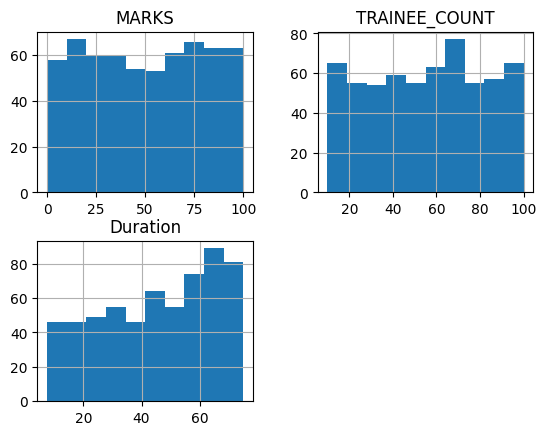

In [180]:
df.hist()

<Axes: >

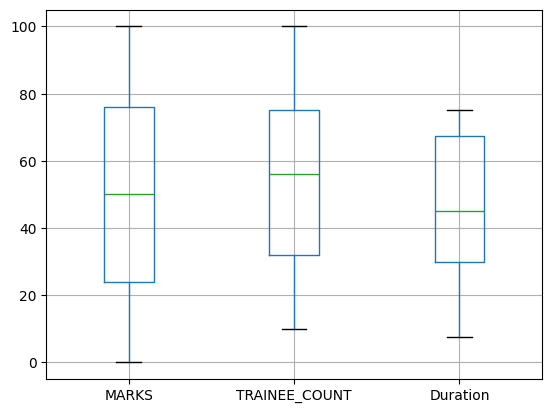

In [181]:
df.boxplot()

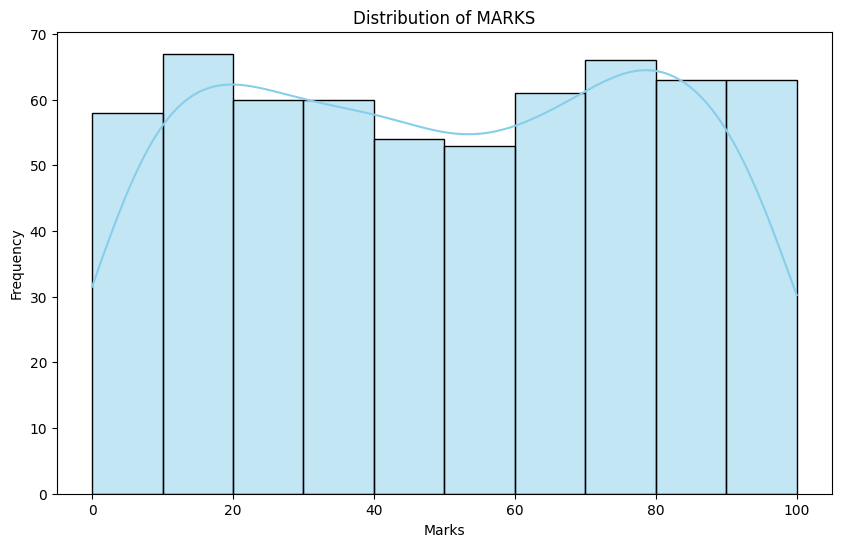

In [182]:

# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['MARKS'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of MARKS')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

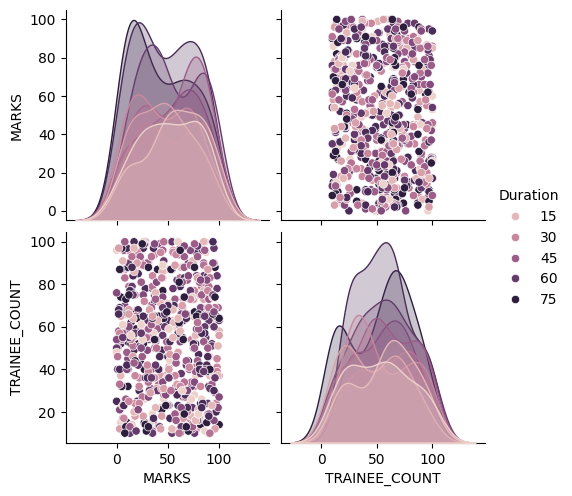

In [183]:
sns.pairplot(df,hue='Duration')
plt.show()

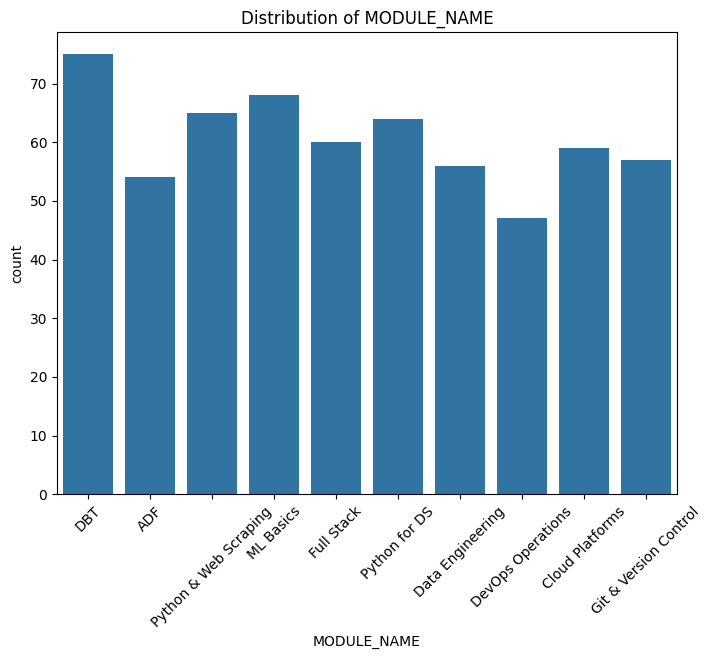

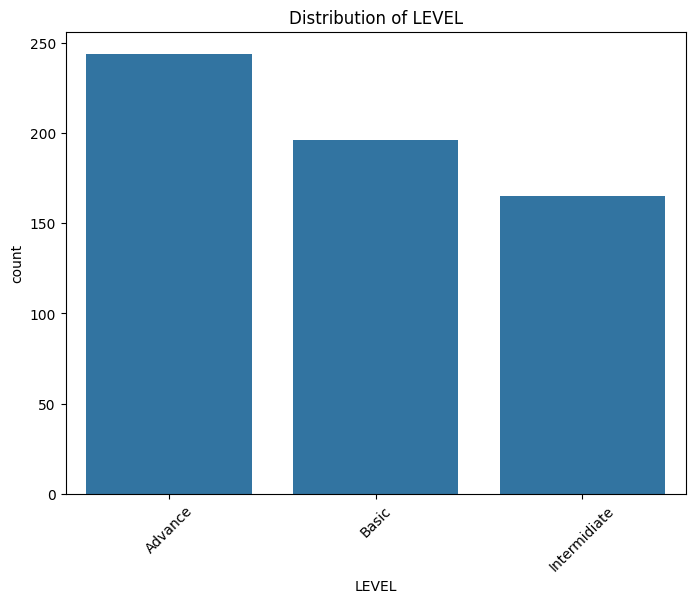

In [184]:
# Distribution of 'MODULE_NAME'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MODULE_NAME')
plt.title('Distribution of MODULE_NAME')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'LEVEL'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='LEVEL')
plt.title('Distribution of LEVEL')
plt.xticks(rotation=45)
plt.show()

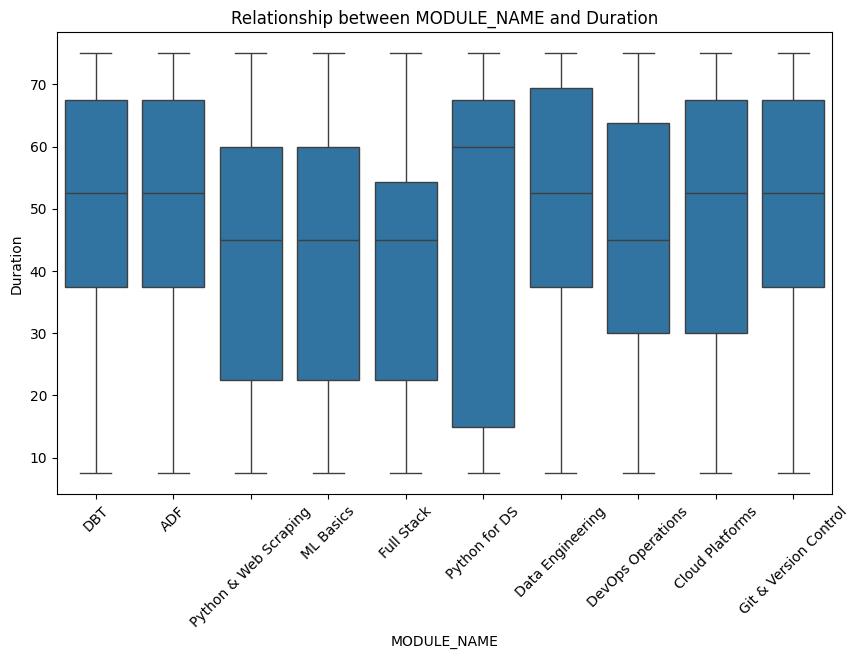

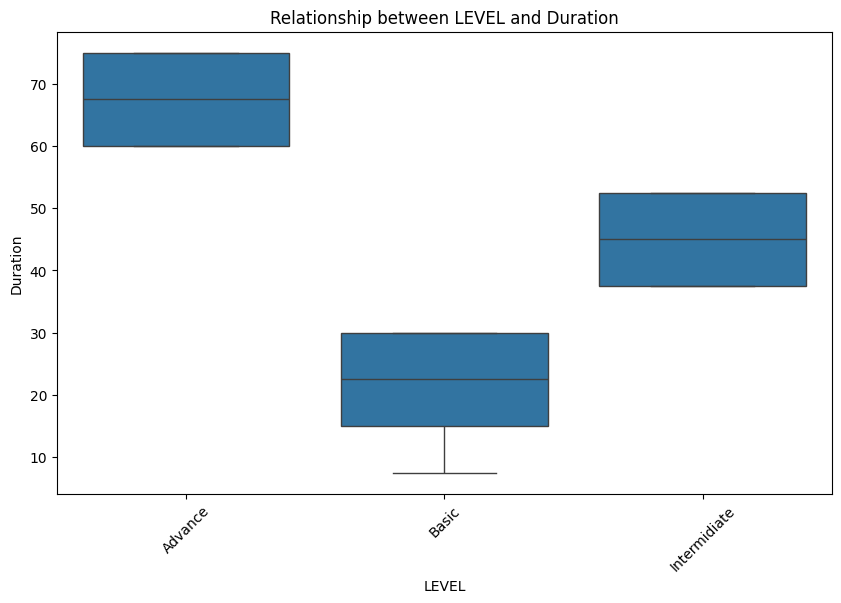

,MARKS,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,14,DBT,14,Advance,Employee,75.0
1,56,DBT,72,Basic,Employee,7.5
2,80,ADF,18,Basic,Employee,22.5
3,91,Python & Web Scraping,37,Basic,Intern,15.0
4,100,ML Basics,37,Intermidiate,Intern,45.0
...,...,...,...,...,...,...
993,82,DevOps Operations,82,Intermidiate,Intern,52.5
995,79,Python for DS,62,Intermidiate,Employee,37.5
997,3,DBT,87,Advance,Employee,75.0
998,60,Cloud Platforms,64,Basic,Employee,15.0


In [185]:
# Relationship between 'MODULE_NAME' and 'Duration'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MODULE_NAME', y='Duration')
plt.title('Relationship between MODULE_NAME and Duration')
plt.xticks(rotation=45)
plt.show()

# Relationship between 'LEVEL' and 'Duration'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LEVEL', y='Duration')
plt.title('Relationship between LEVEL and Duration')
plt.xticks(rotation=45)
plt.show()

df


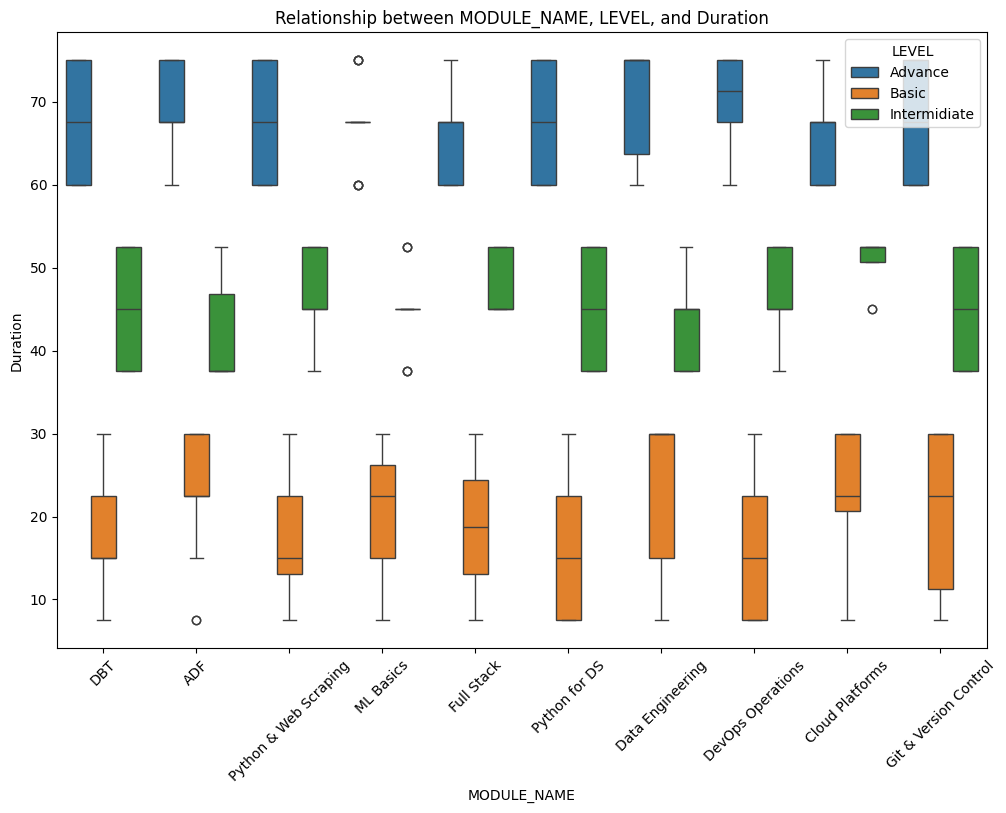

,MARKS,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,14,DBT,14,Advance,Employee,75.0
1,56,DBT,72,Basic,Employee,7.5
2,80,ADF,18,Basic,Employee,22.5
3,91,Python & Web Scraping,37,Basic,Intern,15.0
4,100,ML Basics,37,Intermidiate,Intern,45.0
...,...,...,...,...,...,...
993,82,DevOps Operations,82,Intermidiate,Intern,52.5
995,79,Python for DS,62,Intermidiate,Employee,37.5
997,3,DBT,87,Advance,Employee,75.0
998,60,Cloud Platforms,64,Basic,Employee,15.0


In [186]:
# Relationship between 'MODULE_NAME', 'LEVEL', and 'Duration'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='MODULE_NAME', y='Duration', hue='LEVEL')
plt.title('Relationship between MODULE_NAME, LEVEL, and Duration')
plt.xticks(rotation=45)
plt.legend(title='LEVEL')
plt.show()

df


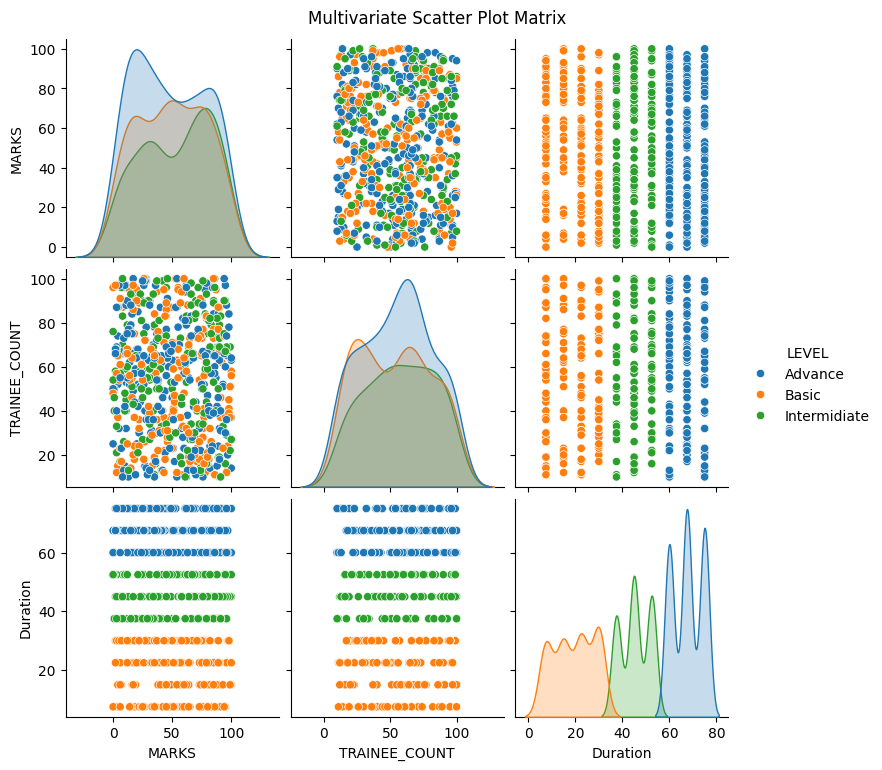

,MARKS,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,14,DBT,14,Advance,Employee,75.0
1,56,DBT,72,Basic,Employee,7.5
2,80,ADF,18,Basic,Employee,22.5
3,91,Python & Web Scraping,37,Basic,Intern,15.0
4,100,ML Basics,37,Intermidiate,Intern,45.0
...,...,...,...,...,...,...
993,82,DevOps Operations,82,Intermidiate,Intern,52.5
995,79,Python for DS,62,Intermidiate,Employee,37.5
997,3,DBT,87,Advance,Employee,75.0
998,60,Cloud Platforms,64,Basic,Employee,15.0


In [187]:
df

# Multivariate scatter plot matrix
sns.pairplot(df, hue='LEVEL', diag_kind='kde')
plt.suptitle('Multivariate Scatter Plot Matrix', y=1.02)
plt.show()


df


In [188]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoding_map = {}
columns_to_encode = ['MODULE_NAME', 'LEVEL', 'ROLE']
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    
    # Store encoding mapping in the dictionary
    encoding_map[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoded DataFrame
print("Encoded DataFrame:")
print(df)

# Print the encoding map
print("\nEncoding Map:")
print(encoding_map)

Encoded DataFrame:
     MARKS  MODULE_NAME  TRAINEE_COUNT  LEVEL  ROLE  Duration
0       14            2             14      0     0      75.0
1       56            2             72      1     0       7.5
2       80            0             18      1     0      22.5
3       91            8             37      1     1      15.0
4      100            7             37      2     1      45.0
..     ...          ...            ...    ...   ...       ...
993     82            4             82      2     1      52.5
995     79            9             62      2     0      37.5
997      3            2             87      0     0      75.0
998     60            1             64      1     0      15.0
999     14            9             56      1     0       7.5

[605 rows x 6 columns]

Encoding Map:
{'MODULE_NAME': {'ADF': 0, 'Cloud Platforms': 1, 'DBT': 2, 'Data Engineering': 3, 'DevOps Operations': 4, 'Full Stack': 5, 'Git & Version Control': 6, 'ML Basics': 7, 'Python & Web Scraping': 8, 'Py

In [189]:
# pearspm co=relation

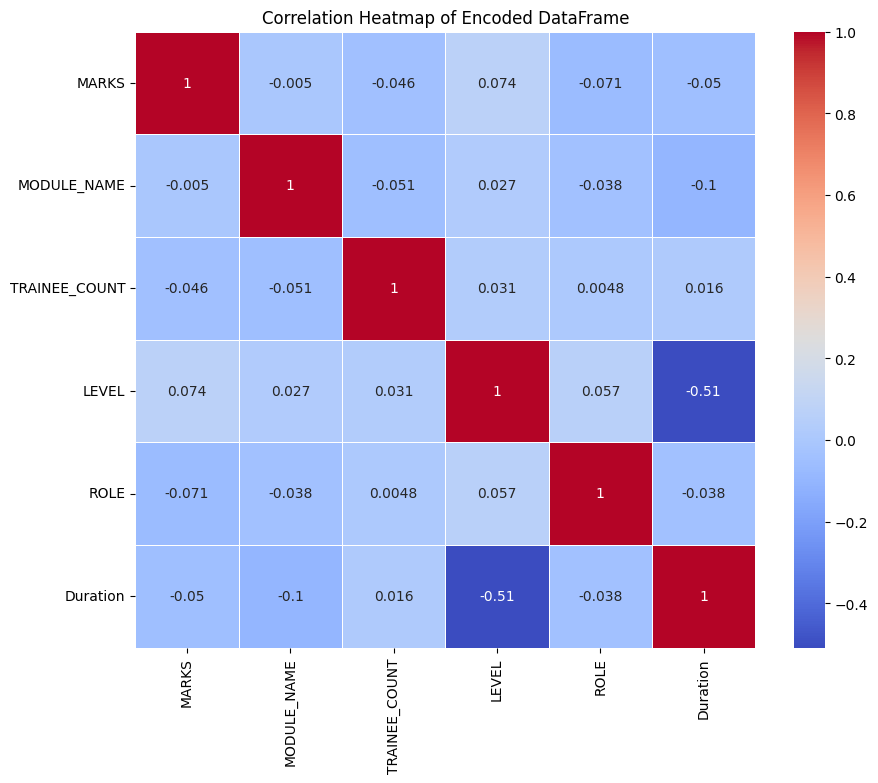

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded DataFrame')
plt.show()


In [191]:
df

,MARKS,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,14,2,14,0,0,75.0
1,56,2,72,1,0,7.5
2,80,0,18,1,0,22.5
3,91,8,37,1,1,15.0
4,100,7,37,2,1,45.0
...,...,...,...,...,...,...
993,82,4,82,2,1,52.5
995,79,9,62,2,0,37.5
997,3,2,87,0,0,75.0
998,60,1,64,1,0,15.0


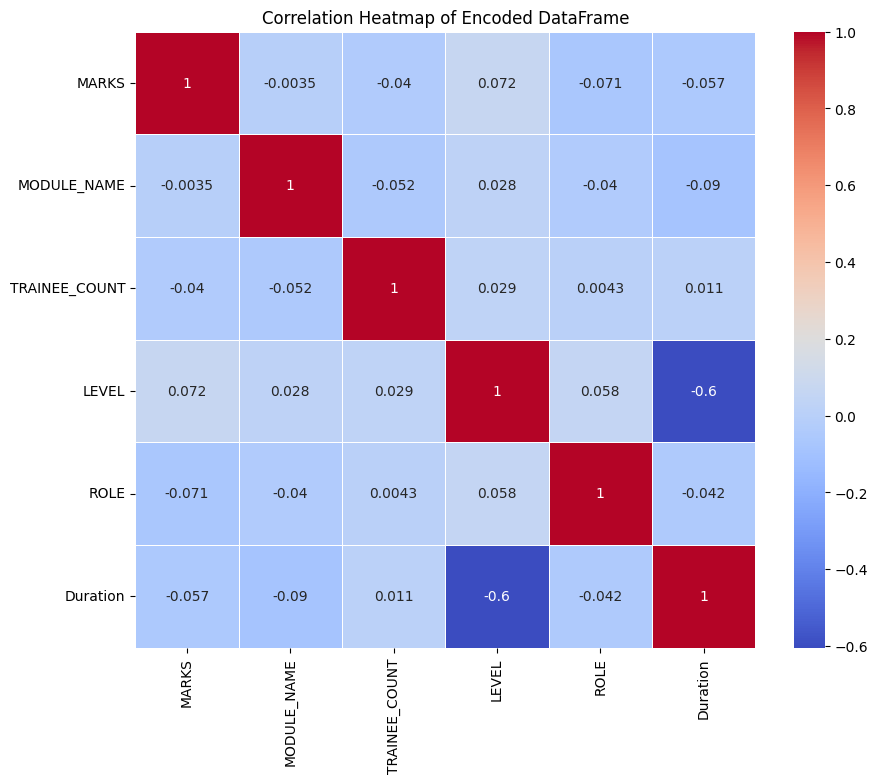

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded DataFrame')
plt.show()


In [193]:
df.drop(['MARKS'],axis=1,inplace=True)

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [195]:
X = df.drop('Duration', axis=1)  # Features (all columns except 'Duration')
y = df['Duration']  # Target variable ('Duration')

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already loaded and split your data into X_train, X_test, y_train, y_test

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'K-Nearest Neighbors (KNN) Regression': KNeighborsRegressor(),
    'Support Vector Machine (SVM) - Linear': SVR(kernel='linear'),
    'Support Vector Machine (SVM) - Gaussian': SVR(kernel='rbf'),
}

# Dictionary to store results
results = {'Model': [], 'RMSE': [], 'R2 Score': []}

# Iterate over each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Calculate R2 Score
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results['Model'].append(model_name)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)

# Create a DataFrame from results
results_df = pd.DataFrame(results)
print(results_df)


                                      Model       RMSE  R2 Score
0                         Linear Regression  18.593028  0.248848
1                          Ridge Regression  18.594159  0.248756
2                          Lasso Regression  18.632554  0.245651
3                                ElasticNet  19.445504  0.178389
4                           Huber Regressor  18.302845  0.272112
5                 Bayesian Ridge Regression  18.603627  0.247991
6                  Decision Tree Regression   7.464620  0.878928
7                  Random Forest Regression   5.981141  0.922269
8              Gradient Boosting Regression   6.191561  0.916703
9                       AdaBoost Regression   6.582589  0.905850
10     K-Nearest Neighbors (KNN) Regression  23.206671 -0.170182
11    Support Vector Machine (SVM) - Linear  18.422755  0.262543
12  Support Vector Machine (SVM) - Gaussian  21.718857 -0.024947


In [198]:
X

,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE
0,2,14,0,0
1,2,72,1,0
2,0,18,1,0
3,8,37,1,1
4,7,37,2,1
...,...,...,...,...
993,4,82,2,1
995,9,62,2,0
997,2,87,0,0
998,1,64,1,0


In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already loaded and split your data into X_train, X_test, y_train, y_test

# Create a Random Forest Regression model
rf_reg = RandomForestRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate RMSE and R2 Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 5.91
R2 Score: 0.92


In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already loaded and split your data into X_train, X_test, y_train, y_test

# Create a Random Forest Regression model with the best hyperparameters
best_rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Train the model on the entire training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate RMSE and R2 Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


RMSE: 5.96
R2 Score: 0.92


In [201]:
import joblib
# Define the file path to save the model
model_filename = 'random_forest_model.pkl'

# Save the model to a .pkl file
joblib.dump(best_rf_model, model_filename)

print(f"Random Forest model saved as {model_filename}")


Random Forest model saved as random_forest_model.pkl


In [202]:
# Define the file path of the saved model
model_filename = 'random_forest_model.pkl'

# Load the saved model from the .pkl file
loaded_model = joblib.load(model_filename)

In [203]:
loaded_model

RandomForestRegressor(max_depth=20, n_estimators=200)

In [204]:
df

,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
0,2,14,0,0,75.0
1,2,72,1,0,7.5
2,0,18,1,0,22.5
3,8,37,1,1,15.0
4,7,37,2,1,45.0
...,...,...,...,...,...
993,4,82,2,1,52.5
995,9,62,2,0,37.5
997,2,87,0,0,75.0
998,1,64,1,0,15.0


In [205]:
df.sample()

,MODULE_NAME,TRAINEE_COUNT,LEVEL,ROLE,Duration
241,2,58,1,1,15.0


In [206]:
np.array([2, 14, 0, 0]).reshape(1, -1)

array([[ 2, 14,  0,  0]])

In [207]:
loaded_model.predict(np.array([2, 14, 0, 0]).reshape(1, -1))

C:\Users\RajibParbat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([73.425])

In [208]:
loaded_model.predict(np.array([5, 66, 2, 1]).reshape(1, -1))

C:\Users\RajibParbat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([49.55035714])

In [ ]:
import joblib
from flask import Flask, request, jsonify
from flask_cors import CORS  # Import CORS from flask_cors

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Define mappings for MODULE_NAME, LEVEL, and ROLE
module_name_map = {
    'ADF': 0, 'Cloud Platforms': 1, 'DBT': 2, 'Data Engineering': 3,
    'DevOps Operations': 4, 'Full Stack': 5, 'Git & Version Control': 6,
    'ML Basics': 7, 'Python & Web Scraping': 8, 'Python for DS': 9
}

level_map = {'Advance': 0, 'Basic': 1, 'Intermediate': 2}

role_map = {'Employee': 0, 'Intern': 1}

app = Flask(__name__)
CORS(app)  # Enable CORS for all routes

def encode_data(data):
    # Encode input data based on mappings
    encoded_data = {
        'MODULE_NAME': module_name_map.get(data['MODULE_NAME'], -1),
        'TRAINEE_COUNT': int(data['TRAINEE_COUNT']),
        'LEVEL': level_map.get(data['LEVEL'], -1),
        'ROLE': role_map.get(data['ROLE'], -1)
    }
    return encoded_data

@app.route('/predict', methods=['POST'])
def predict():
    # Get input values from the POST request
    data = request.get_json()
    
    # Encode input data
    encoded_input = encode_data(data)
    
    # Extract features for prediction
    features = [
        [encoded_input['MODULE_NAME'], encoded_input['TRAINEE_COUNT'],
         encoded_input['LEVEL'], encoded_input['ROLE']]
    ]
    
    # Make prediction using the loaded model
    predicted_duration = model.predict(features)
    
    # Prepare response
    response = {'predicted_duration': predicted_duration[0]}  # Assuming single prediction
    
    return jsonify(response)

if __name__ == '__main__':
    # Run the Flask app on localhost and port 5000
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\RajibParbat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [12/Apr/2024 18:00:50] "POST /predict HTTP/1.1" 200 -
